# Convolutional Neural Network with BatchNormalization and Dropout
using the cats and dogs database (https://www.kaggle.com/c/dogs-vs-cats/data)|

In [ ]:
# Importing libs
from keras.utils import np_utils
from os import listdir
from matplotlib import image
from PIL import Image
import numpy as np
from numpy import asarray
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

import tensorflow as tf
import time

In [1]:
# load all images in a directory
direc = 'C:\\  your directory here  \\Cats and Dogs\\train\\'
img_size = 32

img_resized_data = []
X = []
Y = []
i = 0
    
# Making trainingdata
for filename in listdir(direc):
        
    i+=1
        
    # load image
    img = Image.open(direc1 + '\\' + filename)
    # resizing img
    img = img.resize((img_size, img_size))    
    # appending the img to list 
    img_resized_data.append(np.array(img)) 
    # make label
    if 'cat' in filename:
        Y.append(np.array(0))
    elif 'dog' in filename:
        Y.append(np.array(1))
    
    # feedback on data loading process
    if i%1000 == 0:
        print('{} images have been processed'.format(i))
    
X = np.array(img_resized_data)/255
Y = np.array(Y)
    
print('X containing {} sample of images with size {}x{}x{}.\nY containing {} labels of {} different classes.\n'.format(X.shape[0],X.shape[1],X.shape[2],X.shape[3],Y.shape[0],np.max(Y)+1))

1000 images have been processed
2000 images have been processed
3000 images have been processed
4000 images have been processed
5000 images have been processed
6000 images have been processed
7000 images have been processed
8000 images have been processed
9000 images have been processed
10000 images have been processed
11000 images have been processed
12000 images have been processed
13000 images have been processed
14000 images have been processed
15000 images have been processed
16000 images have been processed
17000 images have been processed
18000 images have been processed
19000 images have been processed
20000 images have been processed
21000 images have been processed
22000 images have been processed
23000 images have been processed
24000 images have been processed
25000 images have been processed
X containing 25000 sample of images with size 32x32x3.
Y containing 25000 labels of 2 different classes.



In [2]:
#--- Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Using TensorFlow backend.


(18750, 32, 32, 3) (18750,) (6250, 32, 32, 3) (6250,)


In [67]:
def makemodel(b,d, drate, atype):

    # create model
    model = Sequential()
    # adding layers
    model.add(Conv2D(32, (3, 3), input_shape=(img_size,img_size,3), padding='same', kernel_initializer='he_uniform'))
    if b:
        model.add(BatchNormalization())
    model.add(Activation(atype))
    if d:
        model.add(Dropout(drate))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform'))
    if b:
        model.add(BatchNormalization())
    model.add(Activation(atype))
    if d:
        model.add(Dropout(drate))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation=atype, kernel_initializer='he_uniform'))
    if d:
        model.add(Dropout(drate))
    model.add(Dense(1, activation='sigmoid'))

    # summarize model
    #model.summary()
    
    # Compile model with 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

In [84]:
def runmodel(model, X_train, y_train, X_test, y_test):

    EarlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, verbose = 0, callbacks=[EarlyStop])

    # Evaluation of the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    return history, train_acc, test_acc

In [93]:
def showresults(history, train_acc, test_acc):
    
    print("Accuracy: {:0.2f}".format(test_acc*100))
    # plot loss during training
    pyplot.figure(figsize=(12, 3))
    pyplot.subplot(121)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(122)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.show()

RUN 1 ---------------------------------------------------------------------------------------------
BatchNormalization: No
Dropout: No
Accuracy: 77.84


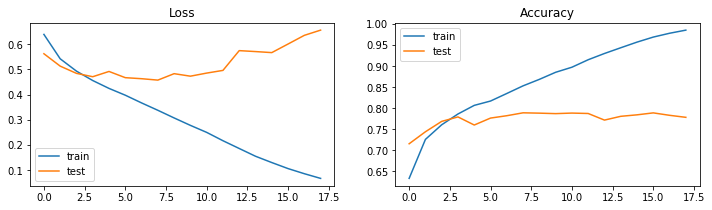

Total runtime: 139.19    Runtime per epoch (average): 7.73

RUN 2 ---------------------------------------------------------------------------------------------
BatchNormalization: Yes
Dropout: No
Accuracy: 78.88


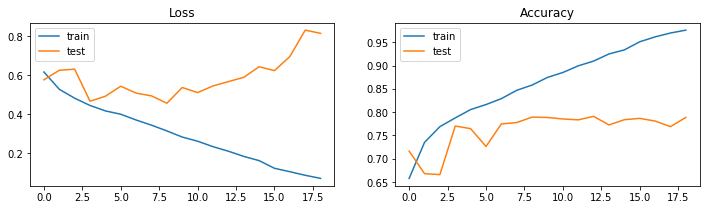

Total runtime: 229.45    Runtime per epoch (average): 12.08

RUN 3 ---------------------------------------------------------------------------------------------
BatchNormalization: No
Dropout: Yes (of 0.3)
Accuracy: 81.26


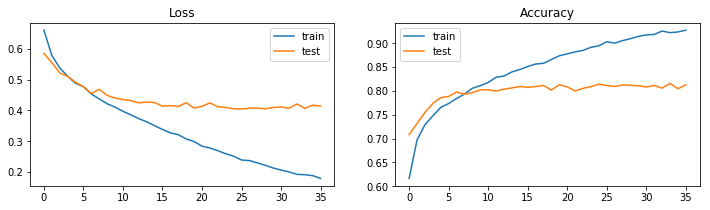

Total runtime: 418.42    Runtime per epoch (average): 11.62

RUN 4 ---------------------------------------------------------------------------------------------
BatchNormalization: Yes
Dropout: Yes (of 0.3)
Accuracy: 80.29


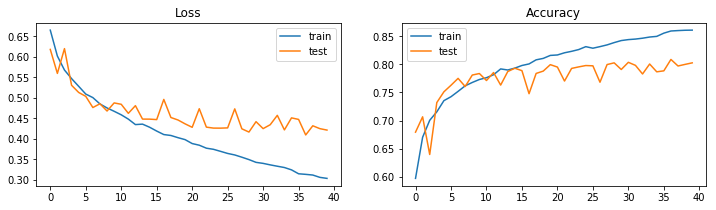

Total runtime: 623.27    Runtime per epoch (average): 15.58



In [94]:
#### MAIN PROGRAM

print('RUN 1 ---------------------------------------------------------------------------------------------')
print('BatchNormalization: No')
print('Dropout: No')
t = time.time()
model = makemodel(b = False,d = False, drate = None, atype = 'relu')
history, train_acc, test_acc = runmodel(model, X_train, y_train, X_test, y_test)
showresults(history, train_acc, test_acc)
print('Total runtime: {:0.2f}    Runtime per epoch (average): {:0.2f}\n'.format((time.time()-t),(time.time()-t)/len(history.history['loss'])))

print('RUN 2 ---------------------------------------------------------------------------------------------')
print('BatchNormalization: Yes')
print('Dropout: No')
t = time.time()
model = makemodel(b = True,d = False, drate = None, atype = 'relu')
history, train_acc, test_acc = runmodel(model, X_train, y_train, X_test, y_test)
showresults(history, train_acc, test_acc)
print('Total runtime: {:0.2f}    Runtime per epoch (average): {:0.2f}\n'.format((time.time()-t),(time.time()-t)/len(history.history['loss'])))

print('RUN 3 ---------------------------------------------------------------------------------------------')
print('BatchNormalization: No')
print('Dropout: Yes (of 0.3)')
t = time.time()
model = makemodel(b = False,d = True, drate = 0.3, atype = 'relu')
history, train_acc, test_acc = runmodel(model, X_train, y_train, X_test, y_test)
showresults(history, train_acc, test_acc)
print('Total runtime: {:0.2f}    Runtime per epoch (average): {:0.2f}\n'.format((time.time()-t),(time.time()-t)/len(history.history['loss'])))

print('RUN 4 ---------------------------------------------------------------------------------------------')
print('BatchNormalization: Yes')
print('Dropout: Yes (of 0.3)')
t = time.time()
model = makemodel(b = True,d = True, drate = 0.3, atype = 'relu')
history, train_acc, test_acc = runmodel(model, X_train, y_train, X_test, y_test)
showresults(history, train_acc, test_acc)
print('Total runtime: {:0.2f}    Runtime per epoch (average): {:0.2f}\n'.format((time.time()-t),(time.time()-t)/len(history.history['loss'])))
